### 손실 곡선

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target),(test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
# 모델 생성
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [4]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

- verbose : 훈련 과정 출력을 조절하는 매개변수(기본값 = 1)
- 기본값일 때 에포크마다 진행 막대와 손실지표들이 출력된다.
- verbose = 2 면, 진행막대가 빠진다.
- verbose = 0 면, 훈련 과정을 나타내지 않는다.

In [7]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

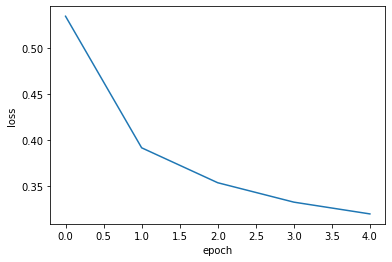

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

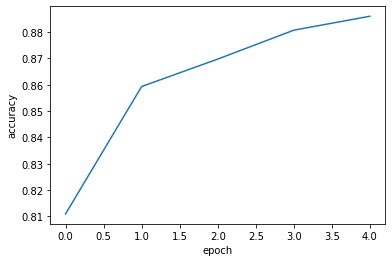

In [10]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

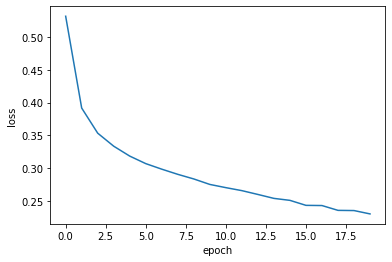

In [12]:
# 에포크의 횟수를 20으로 늘려서 모델을 훈련하고 손실 그래프를 그려보세요.
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [13]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, 
                    verbose=0, validation_data=(val_scaled, val_target))

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

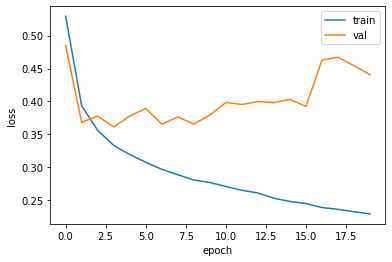

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- 훈련데이터는 꾸준히 감소하지만 검증데이터는 다시 상승하는 부분을 보이는 것은 전형적인 과대적합 모델이 만들어 진것을 말한다.

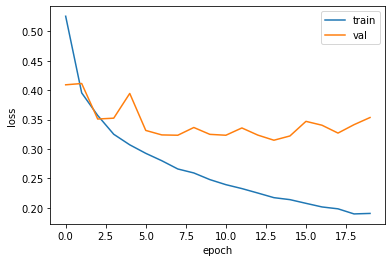

In [17]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, 
                    verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 드롭아웃(Dropout) 
- 훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막는다.

In [18]:
model = model_fn(keras.layers.Dropout(0.3)) # 30%
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


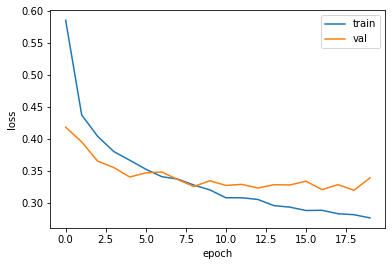

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, 
                    verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [20]:
model = model_fn(keras.layers.Dropout(0.3)) # 30%

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=10, 
                    verbose=0, validation_data=(val_scaled, val_target))

In [23]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target),(test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
train_scaled, train_target, test_size=0.2, random_state=42)


In [24]:
model = model_fn(keras.layers.Dropout(0.3)) # 30%

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=10, 
                    verbose=0, validation_data=(val_scaled, val_target))

In [25]:
# 모델 저장과 복원
# 훈련된 모델의 파라미터를 저장
model.save_weights('model-weights.h5')  # HDF5

In [26]:
# 모델 구조와 모델 파라미터 저장
model.save('model-whole.h5')

In [27]:
# 모델 검증 결과
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis= -1)
print(np.mean(val_labels == val_target))

0.8875


In [28]:
model.evaluate(val_scaled, val_target)

12000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3240850068132083, 0.8875]

In [29]:
model1 = keras.models.load_model('model-whole.h5')
model1.evaluate(val_scaled, val_target)

12000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3240850068132083, 0.8875]